In [232]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [208]:
def montyHall(numberOfDoors, switch):
    #Doors created pre-event
    prize = random.randint(1,numberOfDoors)
    doors = list(range(1,numberOfDoors+1))

    #contenstant selects a door
    selection = random.randint(1,numberOfDoors)
    doorsToReveal = list(range(1,numberOfDoors+1))
    doorsToReveal.remove(selection)
    unselectedDoors = list(range(1,numberOfDoors+1))
    unselectedDoors.remove(selection)

    #host knowingly opens a non-prize door
    if selection != prize:
        doorsToReveal.remove(prize)

    revealedDoor = random.choice(doorsToReveal)
    unselectedDoors.remove(revealedDoor)
    switchDoor = unselectedDoors[0]
    
    #Offered Opportunity to Switch Doors
    if switch:
        #Contestant Switches Doors
        if prize == switchDoor:
            #print('Contestant Wins')
            return True
        else:
            #print('Lose')
            return False
    else:
        #Contestant Keeps their original Door
        if prize == selection:
            #print('Contestant Wins')
            return True
        else:
            #print('Lose')
            return False

In [223]:
def runTest(nTest, nDoors, switch):
    wins = 0
    loses = 0
    
    for _ in range(0,nTest):
        isWin = montyHall(nDoors, switch)
        if isWin:
            wins += 1
        else:
            loses += 1
    
    print('number of wins: ' + str(wins))
    print('number of loses: ' + str(loses))
    
    return [wins,loses]

number of wins: 680
number of loses: 320
number of wins: 346
number of loses: 654


Text(0, 0.5, 'Number of Occurences')

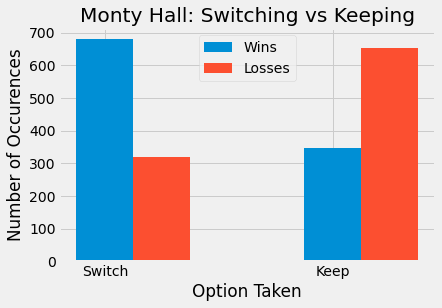

In [287]:
#n is the number of doors the contestant can choose from
n = 3

switchData = runTest(1000, n, True)
keepData = runTest(1000, n, False)

winData = [switchData[0],keepData[0]]
lossData = [switchData[1],keepData[1]]

fig = plt.figure()
plt.style.use('fivethirtyeight')
barWidth = 0.25
labels = ['Switch', 'Keep']
X = np.arange(len(winData))

plt.bar(X, winData, width=barWidth,label='Wins')
plt.bar(X+barWidth, lossData, width=barWidth,label='Losses')

plt.legend(loc=9)
plt.xticks(ticks=X, labels=labels)
plt.title('Monty Hall: Switching vs Keeping')
plt.xlabel('Option Taken')
plt.ylabel('Number of Occurences')